## *USA CAR Dataset Visualization*

##### Objective : 
*Visualize the US car dataset to gain insights*
##### Source:
*Source CAR dataset is taken from Kaggle*

### *Reading and Inspection*

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

cars = pd.read_csv('USA_cars_datasets.csv')
cars.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [209]:
cars.drop(['Unnamed: 0'], axis=1, inplace=True)
cars.head(5)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [210]:
cars.shape

(2499, 12)

In [211]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


### *Data Cleaning*

In [212]:
# find colum-wise null value
cars.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [213]:
# any rows which has all values null
cars.isnull().all(axis=1).sum()

0

In [214]:
round(100*(cars.isnull().sum()/len(cars.index)),2)

price           0.0
brand           0.0
model           0.0
year            0.0
title_status    0.0
mileage         0.0
color           0.0
vin             0.0
lot             0.0
state           0.0
country         0.0
condition       0.0
dtype: float64

*As we can see none of the column has null percentage greater than 0. Hence the data looks good*

### *Drop Unnecessary Columns*
*Drop the columns which might not be required for analysis. Here `vin` num and `lot` num are not required*

In [215]:
cars.head(5)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [216]:
cars.drop(['vin','lot'],axis=1,inplace=True)

In [217]:
cars.head(5)

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [218]:
cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


*As the data frame displays the price of some of the cars is 0. Those data are not valid. Hence remove the rows with `price` as average price*

In [219]:
cars['price'].mean()

18767.671468587436

In [220]:
cars.loc[cars['price']==0, 'price'] = cars['price'].mean()

In [221]:
cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,19090.604591,2016.714286,5.229869e+04
std,11858.849015,3.442656,5.970552e+04
min,25.000000,1973.000000,0.000000e+00
25%,10800.000000,2016.000000,2.146650e+04
50%,17347.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [222]:
carnew = cars.loc[lambda cars:(cars['price']>=18767)]
carnew = carnew.sort_values(by='price', ascending=True)
carnew

,price,brand,model,year,title_status,mileage,color,state,country,condition
347,18767.671469,gmc,door,2004,salvage insurance,235348.0,gold,south carolina,usa,2 days left
545,18767.671469,gmc,door,1993,salvage insurance,0.0,light blue,colorado,usa,18 hours left
309,18767.671469,chevrolet,door,2004,salvage insurance,0.0,maroon,wyoming,usa,18 hours left
391,18767.671469,cadillac,coupe,2000,salvage insurance,105169.0,white,virginia,usa,9 days left
310,18767.671469,chevrolet,door,2003,salvage insurance,194673.0,gray,texas,usa,18 hours left
...,...,...,...,...,...,...,...,...,...,...
1215,65500.000000,ford,srw,2019,clean vehicle,6500.0,black,indiana,usa,21 hours left
277,67000.000000,dodge,challenger,2019,clean vehicle,10944.0,blue,ohio,usa,21 hours left
1336,70000.000000,ford,drw,2019,clean vehicle,9643.0,no_color,illinois,usa,2 days left
1340,74000.000000,ford,drw,2019,clean vehicle,10536.0,no_color,illinois,usa,2 days left


### *Find answers using Data Visualization*

### *How price is distributed?*

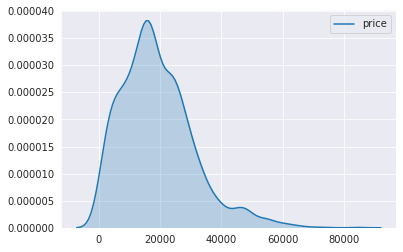

In [223]:
sns.set_style('darkgrid')
sns.kdeplot(cars['price'], label='price', shade=True)

### *Which brand has expensive cars?*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

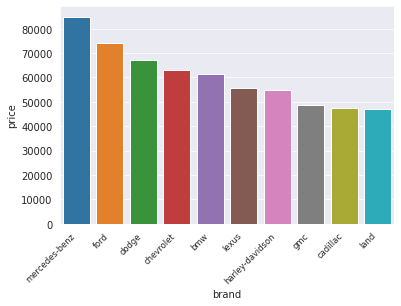

In [233]:
expensive_car = cars.groupby('brand').price.max().reset_index()
expensive_car = expensive_car.sort_values(by=['price'], ascending=False).head(10)
expensive_car
sns.barplot(x=expensive_car['brand'],y=expensive_car['price'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

*As we can see mercedes-benz has the expensive cars*

### *Which color car is more popular?*

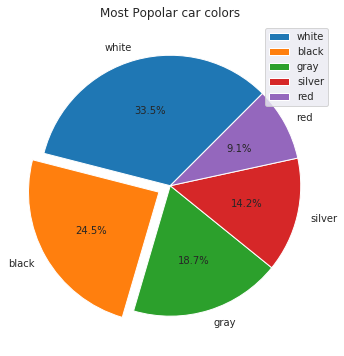

In [277]:
popular_color = cars.groupby('color').model.count().reset_index()
popular_color = popular_color.sort_values(by='model',ascending=False).head(5)
explode =(0,0.1,0,0,0)
fig= plt.subplots(figsize=(12,6))
plt.pie(popular_color['model'],labels=popular_color['color'],explode=explode,textprops=None,autopct='%.1f%%',startangle=45)
plt.title('Most Popolar car colors')
plt.legend(popular_color['color'], loc= 'upper right')
plt.show()

### *Which Brand car is more popular?*

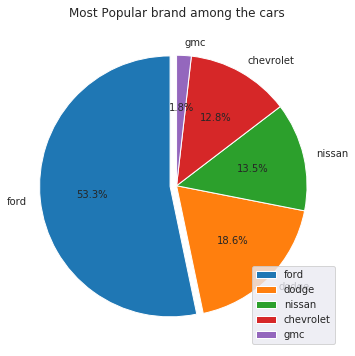

In [285]:
popular_brand = cars.groupby('brand').model.count().reset_index()
popular_brand = popular_brand.sort_values(by='model',ascending=False).head(5)

fig = plt.subplots(figsize=(12,6))
explode = (0.05,0,0,0,0)
plt.pie(popular_brand['model'], labels = popular_brand['brand'], explode=explode,autopct='%.1f%%', startangle =90)
plt.title('Most Popular brand among the cars')
plt.legend(popular_brand['brand'], loc= 'lower right')
plt.show()